In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

np.random.seed(42)

data = []
groups = []
labels_var = []
labels_size = []

variability = [5, 20, 50]
sizes = [10, 100, 10000]

for var in variability:
    for size in sizes:
        data.extend(np.random.normal(20, var, size))
        data.extend(np.random.normal(35, var, size))
        labels_var.extend([var] * size * 2)
        labels_size.extend([size] * size * 2)
        groups.extend(['group1'] * size)
        groups.extend(['group2'] * size)

In [2]:
data = pd.DataFrame({'data': data,
                     'groups': groups,
                     'variability': labels_var,
                     'size': labels_size
                    })
print(data.head())

        data  groups  variability  size
0  22.483571  group1            5    10
1  19.308678  group1            5    10
2  23.238443  group1            5    10
3  27.615149  group1            5    10
4  18.829233  group1            5    10


In [11]:
data_test = data.set_index(['groups', 'size', 'variability'])

tvalues = []
pvalues = []

for size in sizes:
    for var in variability:
        a = data_test['data'].xs(('group1', size, var), level=('groups', 'size', 'variability'))
        b = data_test['data'].xs(('group2', size, var), level=('groups', 'size', 'variability'))
        tval, pval = stats.ttest_ind(b, a, equal_var=True)
        tvalues.append(tval)
        pvalues.append(pval)

           t             p  variability  size
0   5.326814  4.601957e-05            5    10
1   0.572449  5.740987e-01           20    10
2   1.426503  1.708386e-01           50    10
3  23.489845  3.721191e-59            5   100
4   5.531061  9.986173e-08           20   100
5   1.545027  1.239366e-01           50   100


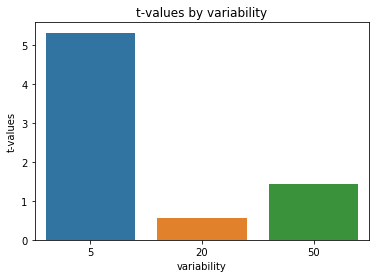

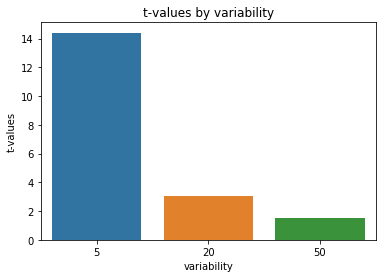

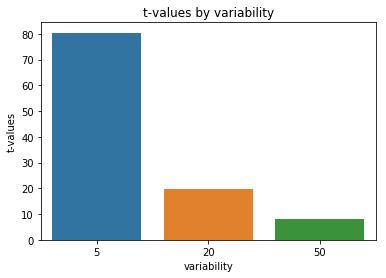

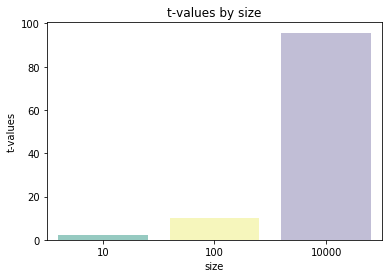

            t             p  variability   size
0    5.326814  4.601957e-05            5     10
1    0.572449  5.740987e-01           20     10
2    1.426503  1.708386e-01           50     10
3   23.489845  3.721191e-59            5    100
4    5.531061  9.986173e-08           20    100
5    1.545027  1.239366e-01           50    100
6  212.593473  0.000000e+00            5  10000
7   53.276388  0.000000e+00           20  10000
8   21.222612  7.263830e-99           50  10000


In [28]:
tvalues_plot = pd.DataFrame({'t': tvalues,
                            'p': pvalues,
                            'variability': variability * 3,
                            'size': np.repeat(sizes, 3)})

print(tvalues_plot.loc[tvalues_plot['size'].isin([10, 100])])
ax = sns.barplot(y='t', x='variability', ci=None, data=tvalues_plot[tvalues_plot['size'] == 10])
ax.set(ylabel='t-values', title='t-values by variability')
plt.show()

ax = sns.barplot(y='t', x='variability', ci=None, data=tvalues_plot[tvalues_plot['size'].isin([10, 100])])
ax.set(ylabel='t-values', title='t-values by variability')
plt.show()

ax = sns.barplot(y='t', x='variability', ci=None, data=tvalues_plot)
ax.set(ylabel='t-values', title='t-values by variability')
plt.show()

ax = sns.barplot(y='t', x='size', ci=None, data=tvalues_plot, palette='Set3')
ax.set(ylabel='t-values', title='t-values by size')
plt.show()

print(tvalues_plot)

$\bar{y_1}= 5$, $\bar{y_2}= 8$, $s_1= 1$, $s_2= 3$, $N_1= 200$, $N_2= 500$

In [32]:
t = (5 - 8) / np.sqrt(1/200 + 9/500)
print(t)

-19.78141420187361


$\bar{y_1}= 1090$, $\bar{y_2}= 999$, $s_1= 400$, $s_2= 30$, $N_1= 900$, $N_2= 100$

In [33]:
t = (1090 - 999) / np.sqrt(400 * 400 / 900 + 30 * 30 / 100)
print(t)

6.658536585365854


$\bar{y_1}= 45$, $\bar{y_2}= 40$, $s_1= 45$, $s_2= 40$, $N_1= 2000$, $N_2= 2000$

In [34]:
t = (45 - 40) / np.sqrt(45 * 45 / 2000 + 40 * 40 / 2000)
print(t)

3.7139067635410377
